In [1]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# get the stock quote
# data frame
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-16')
#show the data
#df

In [3]:
# get # of col and row in the data set
#df.shape

Text(0, 0.5, 'Close Price USD($)')

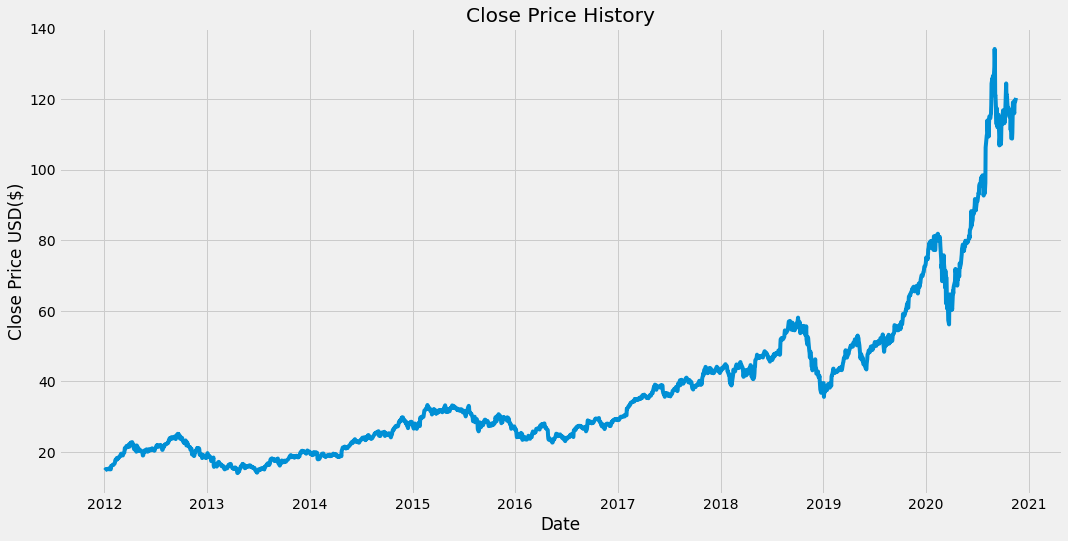

In [4]:
# visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
#plt.show()

In [5]:
# create a new dataframe with only the close column
data = df.filter(['Close'])
# convert the dataframe to a num py array
dataset = data.values
# get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
# scale the data, pre-process transformations, normalize the input data before passing to neural network
# normalize input data to values ranging from zero to one based on the scale of min and max input data value
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # dataset to be zero and one inclusive
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

#print(len(train_data))

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  #if i<=61:
    #print(x_train)
    #print(y_train)
    #print()

SyntaxError: unexpected EOF while parsing (<ipython-input-5-93680064bb7f>, line 26)

In [8]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape

(1728, 60, 1)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Epoch 1/1
1728/1728 [==============================] - 115s 66ms/step - loss: 2.3121e-04


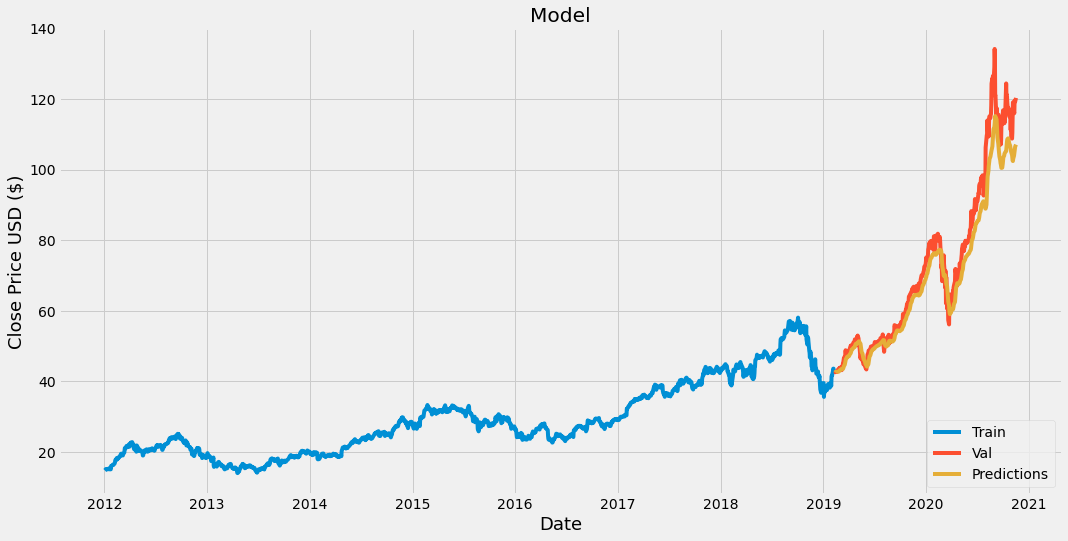

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , : ]
# Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len: , : ]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE), good measure of how accurate of the model respond, lower value of RMSE indicate better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-02-12,42.722500,42.467468
2019-02-13,42.544998,42.579010
2019-02-14,42.700001,42.629425
2019-02-15,42.605000,42.654709
2019-02-19,42.732498,42.653484
...,...,...
2020-11-10,115.970001,104.623604
2020-11-11,119.489998,105.133148
2020-11-12,119.209999,105.833168


In [52]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-16')
# Create new dataframe 
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing prices values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-11-17', end='2020-11-17')
print(apple_quote2['Close'])

# Difference between actual and predicted Price
print(f"Difference between actual and predicted price: {abs(apple_quote2['Close'].values-pred_price)}")

[[107.61968]]
Date
2020-11-17    119.389999
Name: Close, dtype: float64
Difference between actual and predicted price: [[11.77031708]]
